# Lab 1. Linear regression

## Setting

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

## Data

In [232]:
df = pd.read_csv('Chicago.csv')
df.head()

,zipcode,race,fire,theft,age,volact,involact,income
0,60626,10.0,6.2,29,60.4,5.3,0.0,11744
1,60640,22.2,9.5,44,76.5,3.1,0.1,9323
2,60613,19.6,10.5,36,73.5,4.8,1.2,9948
3,60657,17.3,7.7,37,66.9,5.7,0.5,10656
4,60614,24.5,8.6,53,81.4,5.9,0.7,9730


In [233]:
df.isna().any()

zipcode     False
race        False
fire        False
theft       False
age         False
volact      False
involact    False
income      False
dtype: bool

For correlation analysis exlude zipcode, since its numerical value has no sense 

In [234]:
corr = df.drop("zipcode", axis=1).corr()

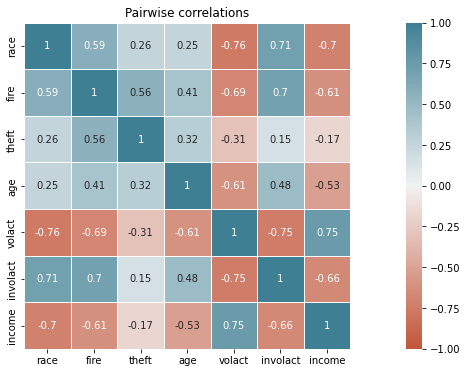

In [235]:
hmap = sns.heatmap(corr, square=True, linewidths=0.5, cmap=sns.diverging_palette(20, 220, n=256), annot=corr, vmin=-1, vmax=1, center=0)
hmap.set_title('Pairwise correlations')
plt.show()

In [236]:
y = df['involact']
x = df.drop(columns=['involact', 'zipcode'])

## LSE 

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [241]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

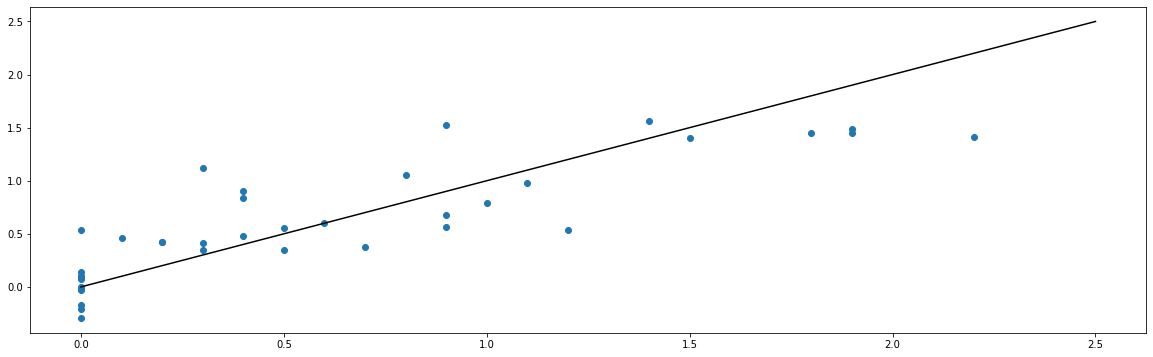

In [242]:
plt.scatter(y_train, y_train_pred)
plt.plot([0, 2.5], [0, 2.5], color='black')
plt.show()

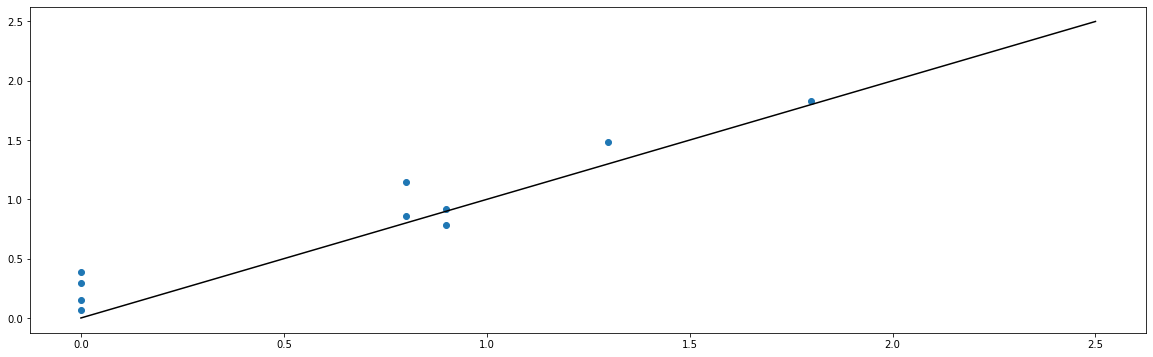

In [243]:
plt.scatter(y_test, y_test_pred)
plt.plot([0, 2.5], [0, 2.5], color='black')
plt.show()

### Metrics

In [244]:
models_metrics = []

In [245]:
lr = {}
lr['model'] = 'LinearRegression()'

In [246]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Total sum of squares

In [247]:
ss_tot = ((y_test - y_test.mean()) ** 2).sum()
ss_tot

3.605

Residual sum of squares

In [248]:
ss_res = ((y_test_pred - y_test) ** 2).sum()
ss_res

0.4322186029099767

$R^2$ score (doesn't look good)

In [249]:
1 - ss_res / ss_tot

0.8801057966962617

In [250]:
r2_score(y_test, y_test_pred)

0.8801057966962617

In [251]:
lr['r2_score test'] = r2_score(y_test, y_test_pred)
lr['r2_score train'] = r2_score(y_train, y_train_pred)

Variance of prediction

In [252]:
(y_test_pred - y_test_pred.mean() ** 2).mean()

0.16482414638939097

In [253]:
lr['var test'] = y_test_pred.var()
lr['var train'] = y_train_pred.var()

mse

In [254]:
mean_squared_error(y_test_pred, y_test)

0.04322186029099767

In [255]:
lr['mse train'] = mean_squared_error(y_train, y_train_pred)
lr['mse test'] = mean_squared_error(y_test, y_test_pred)

In [256]:
models_metrics.append(lr)

F-test

In [257]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [258]:
fval, pval = f_regression(x_train, y_train)

In [259]:
fval

array([34.64954394, 24.50822078,  0.70575151, 14.7210013 , 40.50608052,
       23.81090835])

In [260]:
x.head()

,race,fire,theft,age,volact,income
0,10.0,6.2,29,60.4,5.3,11744
1,22.2,9.5,44,76.5,3.1,9323
2,19.6,10.5,36,73.5,4.8,9948
3,17.3,7.7,37,66.9,5.7,10656
4,24.5,8.6,53,81.4,5.9,9730


As we can see from calculated F-statistics, the most valuable features are `volact`, `race` and `income`

## Ridge regression

In [261]:
from sklearn.linear_model import Ridge

In [262]:
models = {
    "Ridge(a=0.1)": Ridge(alpha=0.1),
    "Ridge(a=1)": Ridge(alpha=1),
    "Ridge(a=10)": Ridge(alpha=10),
    "Ridge(a=100)": Ridge(alpha=100)
}

In [263]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_metrics = {}
    model_metrics['model'] = name
    
    model_metrics['r2_score test'] = r2_score(y_test, y_test_pred)
    model_metrics['r2_score train'] = r2_score(y_train, y_train_pred)
    
    model_metrics['mse test'] = mean_squared_error(y_test, y_test_pred)
    model_metrics['mse train'] = mean_squared_error(y_train, y_train_pred)
    
    model_metrics['var test'] = y_test_pred.var()
    model_metrics['var train'] = y_train_pred.var()
    
    models_metrics.append(model_metrics)

In [264]:
pd.DataFrame(models_metrics)

,model,r2_score test,r2_score train,var test,var train,mse train,mse test
0,LinearRegression(),0.880106,0.714879,0.304882,0.287090,0.114502,0.043222
1,Ridge(a=0.1),0.880102,0.714879,0.304858,0.287081,0.114502,0.043223
2,Ridge(a=1),0.880070,0.714879,0.304646,0.286999,0.114502,0.043235
3,Ridge(a=10),0.879720,0.714867,0.302589,0.286198,0.114507,0.043361
4,Ridge(a=100),0.874436,0.713992,0.285991,0.279222,0.114859,0.045266


As we can see, with varianing $\alpha$ parameter of ridge regression, all main metrics remains almost the same, except variance, which decreases a bit with $\alpha=100$ 

Also it looks like ridge regression shows the same results as usual one

## Non-linear regression

In [265]:
from sklearn.preprocessing import PolynomialFeatures

In [266]:
poly = PolynomialFeatures(degree=2)

In [267]:
x_train_p = poly.fit_transform(x_train)
x_test_p = poly.fit_transform(x_test)

In [268]:
model = LinearRegression()
model.fit(x_train_p, y_train)
y_train_pred = model.predict(x_train_p)
y_test_pred = model.predict(x_test_p)

model_metrics = {}
model_metrics['model'] = 'Polynomial regression'

model_metrics['r2_score test'] = r2_score(y_test, y_test_pred)
model_metrics['r2_score train'] = r2_score(y_train, y_train_pred)

model_metrics['mse test'] = mean_squared_error(y_test, y_test_pred)
model_metrics['mse train'] = mean_squared_error(y_train, y_train_pred)

model_metrics['var test'] = y_test_pred.var()
model_metrics['var train'] = y_train_pred.var()

models_metrics.append(model_metrics)

In [269]:
pd.DataFrame(models_metrics)

,model,r2_score test,r2_score train,var test,var train,mse train,mse test
0,LinearRegression(),0.880106,0.714879,0.304882,0.287090,0.114502,0.043222
1,Ridge(a=0.1),0.880102,0.714879,0.304858,0.287081,0.114502,0.043223
2,Ridge(a=1),0.880070,0.714879,0.304646,0.286999,0.114502,0.043235
3,Ridge(a=10),0.879720,0.714867,0.302589,0.286198,0.114507,0.043361
4,Ridge(a=100),0.874436,0.713992,0.285991,0.279222,0.114859,0.045266
5,Polynomial regression,-6.036634,0.895587,1.790215,0.412822,0.041932,2.536707


As we can see, with polynomial features of degree 2 we have much better mse on the train data, but at the same time muuuuch worse mse on the test data, so overfitting of this model is obvious 

## Features selection 

The most obvious idea is to use results of the F-test from the first section to filter out features with not so high F-statistic value

So lets remove `theft` and `age` fields from the data

In [270]:
x_train_s = x_train.drop(columns=['theft', 'age'])
x_test_s = x_test.drop(columns=['theft', 'age'])

In [271]:
model = LinearRegression()
model.fit(x_train_s, y_train)
y_train_pred = model.predict(x_train_s)
y_test_pred = model.predict(x_test_s)

model_metrics = {}
model_metrics['model'] = 'Linear reg with f-selection'

model_metrics['r2_score test'] = r2_score(y_test, y_test_pred)
model_metrics['r2_score train'] = r2_score(y_train, y_train_pred)

model_metrics['mse test'] = mean_squared_error(y_test, y_test_pred)
model_metrics['mse train'] = mean_squared_error(y_train, y_train_pred)

model_metrics['var test'] = y_test_pred.var()
model_metrics['var train'] = y_train_pred.var()

models_metrics.append(model_metrics)

In [272]:
pd.DataFrame(models_metrics)

,model,r2_score test,r2_score train,var test,var train,mse train,mse test
0,LinearRegression(),0.880106,0.714879,0.304882,0.287090,0.114502,0.043222
1,Ridge(a=0.1),0.880102,0.714879,0.304858,0.287081,0.114502,0.043223
2,Ridge(a=1),0.880070,0.714879,0.304646,0.286999,0.114502,0.043235
3,Ridge(a=10),0.879720,0.714867,0.302589,0.286198,0.114507,0.043361
4,Ridge(a=100),0.874436,0.713992,0.285991,0.279222,0.114859,0.045266
5,Polynomial regression,-6.036634,0.895587,1.790215,0.412822,0.041932,2.536707
6,Linear reg with f-selection,0.858105,0.612930,0.278670,0.246148,0.155444,0.051153


As we can see, with this procedure model is worse than usual linear regression in terms of mse, but has lower variance of prediction